# Stock Price Predictor - Exploratory Data Analysis

## Notebook Overview
- [1. Introduction](#introduction)
- [2. Load Data](#load-data)
- [3. Understand Data](#understand-data)
- [4. Explore Data](#explore-data)
    - Describe
    - Visualise

<a id="introduction"></a>
# 1. Introduction

An ideal real-world application of machine learning is in the world of trading and investing. It all works on predicting what will have to the price of a stock in the next few minutes or a few years. Hence, the aim is to **predict** and there is a **large amount of historical data** available to assist in making a prediction. Laying out the foundation to apply some machine learning algorithms.

I decided to take on this problem due to my interest in finance and some internship experience at a start-up that focuses on machine learning applications in intraday trading. I believe working on this project will give me a better understanding of the financial markets (finance in general) and time-series machine learning problems. As I have new to the world of machine learning and finance, I have decided to carry out technical analysis using the historical data of stocks.

## Problem Statement

**The aim of this project is to predict the long-term price trend of two indices and one stock with at least 90% accuracy.<sup>1</sup>** The stocks and indices will be chosen based on countries of interest and personal preference, but are clearly defined in the [Datasets and Inputs section](#Datasets-and-Inputs). In the end, the ability of the model will be tested by making predicting one full year worth of data. Furthermore, the model&#39;s ability to predict how the stocks performed in 2020 (the year of the pandemic) will be observed.

<sup>*1*</sup> *90% accuracy can be taken as 10% mean absolute percentage error.*

## Evaluation Metrics

I will be using two evaluation metrics to understand the model&#39;s performance.

1. **Mean Absolute Percentage Error (MAPE)**: It is the mean of percentage of absolute errors of the predictions. The following formula explains how it is calculated (&#39;MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)&#39;, 2006; Glen, 2011) :

2. **Percentage Points Correctly Predicted** : It is the percentage of actual points that lie in the 30-70 (shorter inter-quartile) range of the predictions.

![Example Graph](images/metric-example-graph.png)

In the example graph above, it is clear that there are 3 out of 5 points fall in the 30-70 quartile range. Hence,

I came up with this metric as a solution to the problem predicting for larger intervals. I intend to use this to be understand of the model can make accurate predictions on the long-term trends. However, some weakness of the metric would be its inability to give great results for predictions with high variability (standard deviation). As a high standard deviation would be a larger area is covered by the predictions, the probability of the actual value to land within the 30-70 range is higher. However, if the standard deviation is high, the model is not following any specific trend (up or down) but is just spreading in both directions, leading to an inaccurate measure of what is actually happening.

Hence, a combination of MAPE and Percentage Points will give a better understanding of how the model is performing.

<a id="load-data"></a>
# 2. Load Modules and Data
All the required modules will be loaded here along with the data from the `CSV` files in the `data` directory files.

> **Citation for data**: _Yahoo Finance – stock market live, quotes, business &amp; finance news_ (no date). Available at: https://in.finance.yahoo.com/ (Accessed: 2 October 2020).

In [1]:
import pandas as pd
import numpy as np
import os
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime

pd.set_option('display.max_rows', None)
timezone_str = 'Asia/Kolkata'
localtz = pytz.timezone(timezone_str)

The following stock/indices are going to be considered for the analysis:
1. **S&amp;P 500 (`^GSPC`)**: from December 30, 1927 to October 02, 2020
2. **S&amp;P BSE SENSEX (`^BSESN`)**: from July 01, 1997 to October 02, 2020
3. **Apple Inc. (`AAPL`)**: from December 12, 1980 to October 02, 2020

To easily access data for a particular stock or index, a python dictionary will be created using the `Ticker` names as `keys` and `values` being `pandas dataframes` with the columns. 

In [2]:
# Load stocks data
stock_names = {'^GSPC': 'S&P 500',
               '^BSESN': 'S&P BSE SENSEX',
               'AAPL': 'Apple Inc.'}

data_dir = 'data'
data = {}

for stock in stock_names.keys():
    data[stock] = pd.read_csv(os.path.join(data_dir, stock + '.csv'),
                              parse_dates=True, index_col=['Date'])
    data[stock] = data[stock].dropna()

In [3]:
data['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


<a id="understand-data"></a>
# 3. Understand Data
There are `six` columns (excluding the index column) that define a stock's position on a particular date.
the cash value of the last transacted price before the market closes
1. `Open`: "_cash value_" of the first transaction **after** the market **opens** on the particular date.
2. `High`: highest value of the stock price for the specific date.
3. `Low`: "_cash value_" of the last transaction **before** the market **closes** on the particular date.
4. `Close`: stock price when the market **closed** on the respective date.
5. `Adj Close`: "_reflects that stock's value after accounting for any corporate actions_"
6. `Volume`: the volume of stocks traded on a specific date.
> **Citation for the above definitions**: _Hanks, G. (2014) ‘Adjusted closing price vs closing price’, pp. 1–7._ Available at: https://www.investopedia.com/terms/a/adjusted_closing_price.asp (Accessed: 14 October 2020).


In [4]:
data['AAPL'].info(), data['AAPL'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10036 entries, 1980-12-12 to 2020-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10036 non-null  float64
 1   High       10036 non-null  float64
 2   Low        10036 non-null  float64
 3   Close      10036 non-null  float64
 4   Adj Close  10036 non-null  float64
 5   Volume     10036 non-null  float64
dtypes: float64(6)
memory usage: 548.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [5]:
data['AAPL'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,10036.000000,10036.000000,10036.000000,10036.000000,10036.000000,1.003600e+04
mean,9.235847,9.333947,9.136442,9.239224,8.699618,3.409235e+08
std,17.515780,17.715709,17.313096,17.525737,17.146750,3.424233e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,1.388800e+06
25%,0.270290,0.276741,0.264509,0.270424,0.230265,1.315287e+08
50%,0.437589,0.446429,0.430804,0.439018,0.369728,2.282560e+08
75%,10.730357,10.788839,10.648214,10.722500,9.265733,4.248433e+08
max,137.589996,137.979996,130.529999,134.179993,134.179993,7.421641e+09


Points to note:
1. There are `10,036 rows`.
2. `Adj Close` has the lowest mean and standard deviation.

<a id="explore-data"></a>
# 4. Explore Data - Visualise
`plot_data()` function from `helper_functions.py` will be used to visualise data. Furthermore, `mplfinance` package will be used later. 

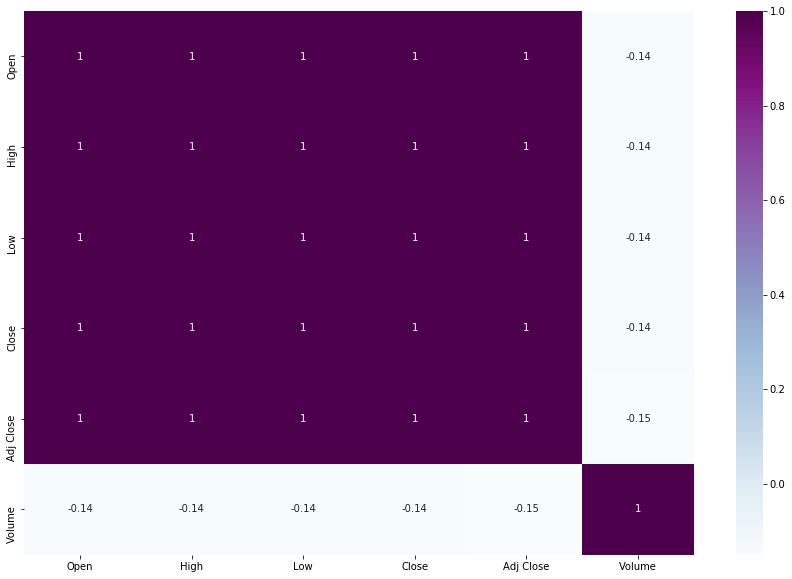

In [6]:
# Plotting correleration matrix
corr = data['AAPL'].corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='BuPu', annot=True);

As expected, 
> **all the prices are very strongly correlated to each other.**

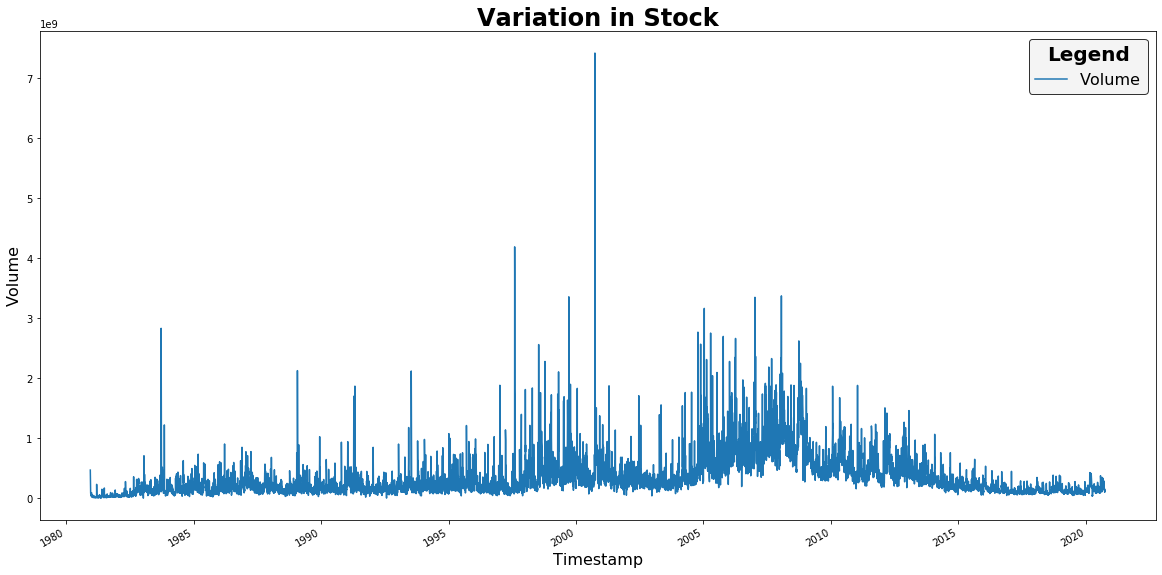

In [7]:
from helper_functions import plot_data

plot_data(data['AAPL'], columns=['Volume'], ylabel='Volume', figsize=(20,10));

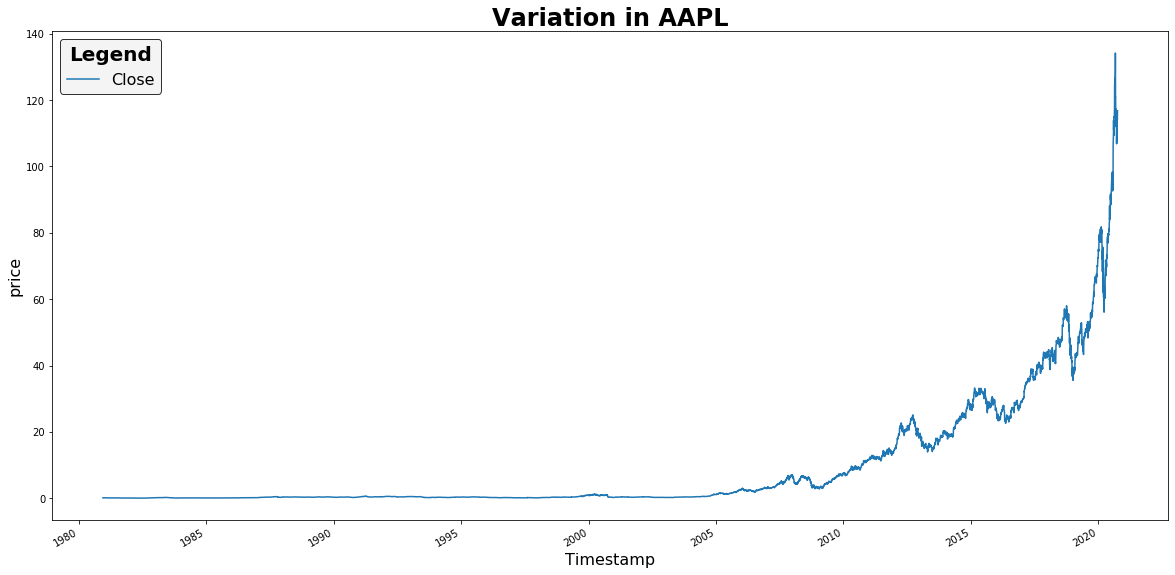

In [8]:
plot_data(data['AAPL'], columns=['Close'], stock_name='AAPL', ylabel='price', figsize=(20,10));

In the above graph we can see that most of the movement in the stock price happens after the year `2005`. 
To better visualise the data, we should plot a candlestick plot. I will be using the [mplfinance module](https://github.com/matplotlib/mplfinance) to create the plot. First, the module is to be installed from PyPi.

In [9]:
!pip install --quiet mplfinance

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


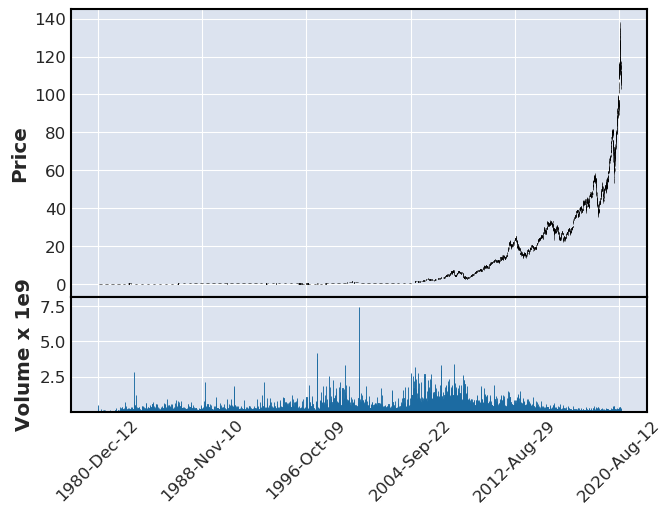

In [10]:
# plotting the data
import mplfinance as mpf

mpf.plot(data['AAPL'],
         type='candle',
         volume=True)

The data in the above graph is not clear or understandable. Hence, candlesticks need to be made thicker. This is going to be done by converting the data to yearly data.

In [11]:
freq = 'Y'

logic = {'Open'  : 'first',
         'High'  : 'max',
         'Low'   : 'min',
         'Close' : 'last',
         'Adj Close': 'last',
         'Volume': 'sum'}

yearly_data = data['AAPL'].resample(freq).apply(logic)

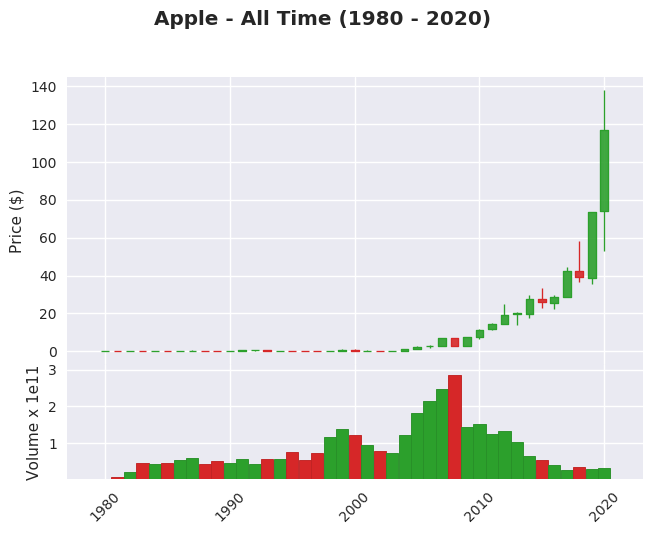

In [12]:
# plotting yearly data - AAPL
mc = mpf.make_marketcolors(
    up='tab:green',down='tab:red',
    edge='inherit',
    wick='inherit',
    volume='inherit'
)

style = mpf.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc)

mpf.plot(yearly_data,
         type='candle',
         volume=True,
         style=style,
         title='Apple - All Time (1980 - 2020)',
         ylabel='Price ($)',
         datetime_format='%Y')

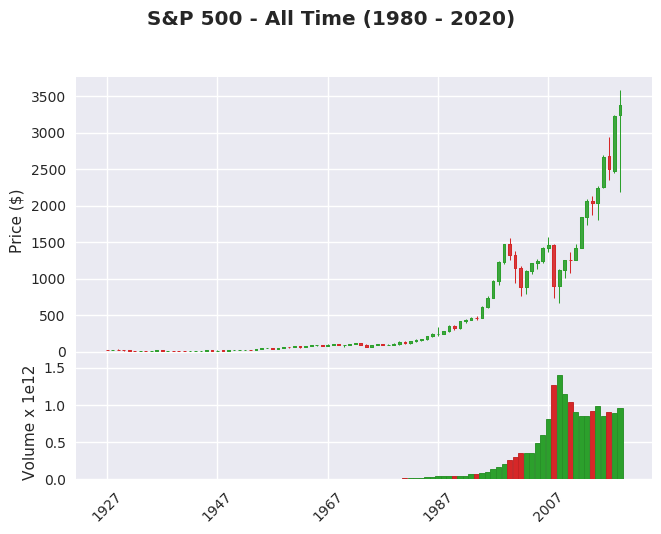

In [13]:
# Save yearly_data into a dictionary
yearly_data = {}
yearly_data['AAPL'] = yearly_data

yearly_data['^GSPC'] = data['^GSPC'].resample(freq).apply(logic)

# Plot yearly data - S&P 500
mpf.plot(yearly_data['^GSPC'],
         type='candle',
         volume=True,
         style=style,
         title='S&P 500 - All Time (1980 - 2020)',
         ylabel='Price ($)',
         datetime_format='%Y')

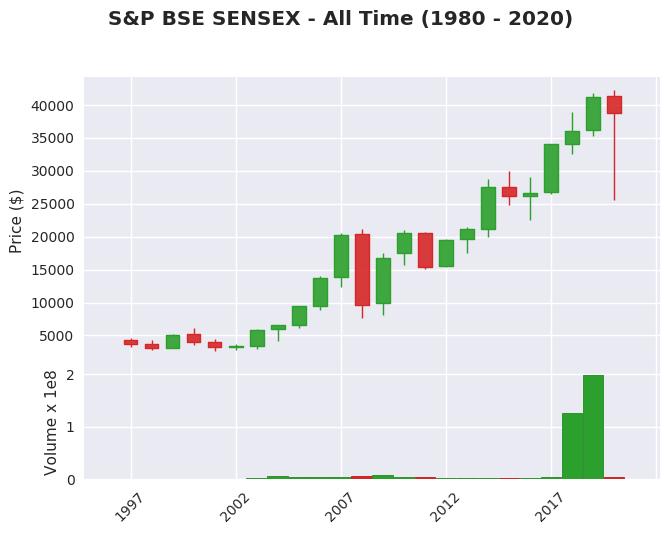

In [14]:
yearly_data['^BSESN'] = data['^BSESN'].resample(freq).apply(logic)

mpf.plot(yearly_data['^BSESN'],
         type='candle',
         volume=True,
         style=style,
         title='S&P BSE SENSEX - All Time (1980 - 2020)',
         ylabel='Price ($)',
         datetime_format='%Y')

In all the graphs above, majority of the movement in the market has occurred post 2002, on average. A good volume of `AAPL` is being traded throughout the period, but a movement in price is seen post the year 2005. On the other hand, `S&P 500` around the year 2000. Finally, significant volume of shares are being traded post the year 2002 for `S&P BSE SENSEX`. Hence, the data is going to be truncated and the period **2002 to 2020** should be ideal for this project.

In [15]:
# Updating dictionaries.
start = datetime.datetime(2002, 1, 1)

data_updated = {}

for name, df in data.items():
    data_updated[name] = df.loc[start:]
    yearly_data[name] = df.loc[start:].resample(freq).apply(logic)

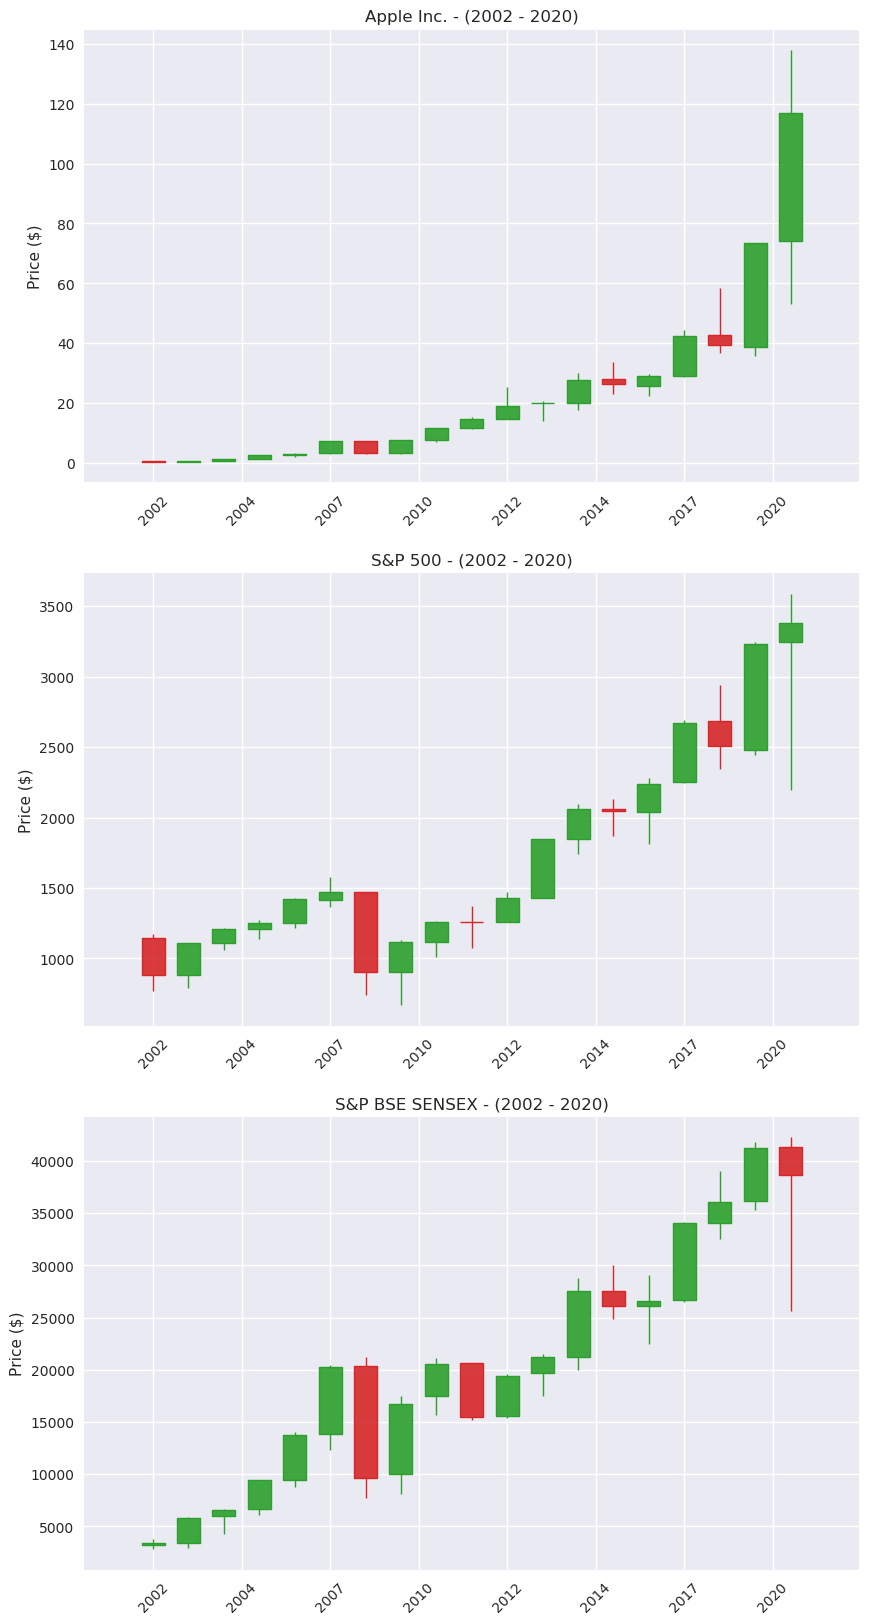

In [16]:
fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         figsize=(10,20))

for (name, df), ax in zip(yearly_data.items(), axes):
    mpf.plot(df,
             type='candle',
             ax=ax,
             style=style,
             axtitle=f'{stock_names[name]} - (2002 - 2020)',
             ylabel='Price ($)',
             datetime_format='%Y')

As it would be for any stock, we see a dip in the price around 2008, when the financial crisis occurred. Otherwise, there is a general rising trend.

For `AAPL` there is another dip observed in the year 2011, that was the year when one of Apple Inc.'s founders' died: Steve Jobs.

Viewing yearly data gives a better understanding of what is happening to a stock year-on-year and could be linked to a particular cause. Candlestick plots work best to understand the change in a stock price.

As we will be looking at doing a univariate time series analysis, let's visualise the `Adj Close` price for the stocks on a line graph.

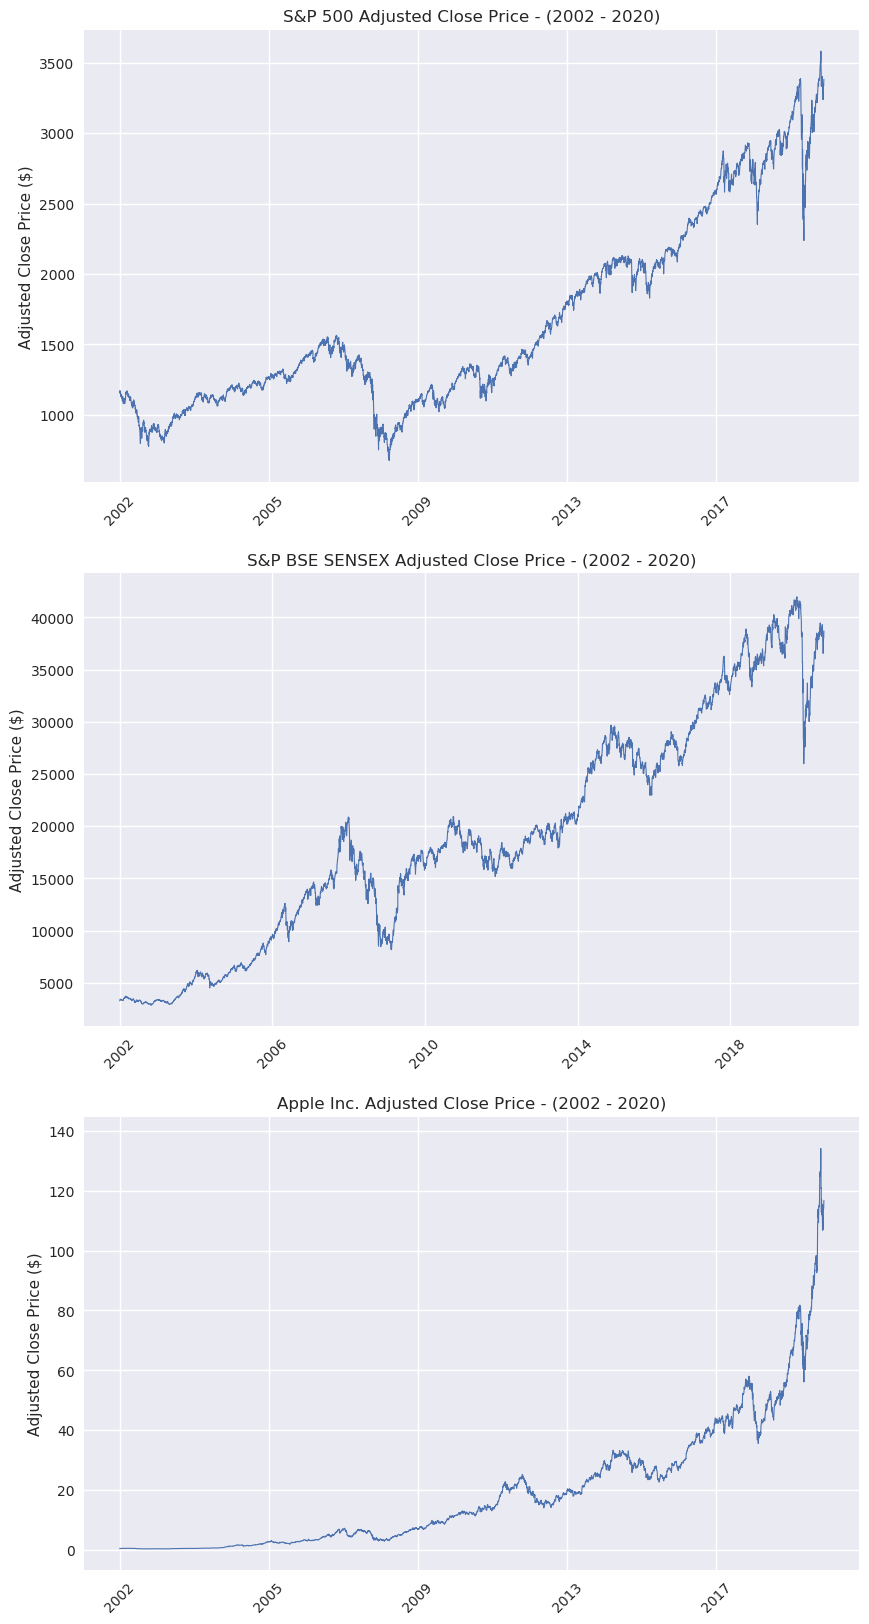

In [17]:
fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         figsize=(10,20))

for (name, df), ax in zip(data_updated.items(), axes):
    mpf.plot(df,
             type='line',
             ax=ax,
             style=style,
             axtitle=f'{stock_names[name]} Adjusted Close Price - (2002 - 2020)',
             ylabel='Adjusted Close Price ($)',
             datetime_format='%Y')

In [18]:
yearly_data['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-12-31,0.393750,0.467321,0.238571,0.255893,0.221127,7.701393e+10
2003-12-31,0.256429,0.446607,0.227143,0.381607,0.329762,7.123025e+10
2004-12-31,0.384821,1.242321,0.378214,1.150000,0.993760,1.218017e+11
2005-12-31,1.156786,2.695000,1.117857,2.567500,2.218677,1.824010e+11
2006-12-31,2.585000,3.327143,1.791429,3.030000,2.618342,2.156990e+11


# Concluding Remarks
- All the prices are strong correlated to each other and volume and prices have a weak correlation.
- It is clear that the data we are dealing with does not have seasonal trends.
- All the visualisations should be helpful when we try to stationarize the time series.

Let us now oberserve how a model will perform on the data. First, we need to prepare the to train and test a model.